# Credit Card Fraud Detection

#### Theory

#### Approach

#### Importing all the necessary libraries.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

%matplotlib inline

#### Importing dataset and creating the dataframe named df.

In [2]:
df = pd.read_csv('fraudTrain.csv',parse_dates=['trans_date_trans_time'])

In [3]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.keys()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df['hour'] = df.trans_date_trans_time.dt.hour

In [7]:
df.drop('trans_date_trans_time','columns',inplace = True)

In [8]:
new_df = df[['cc_num','amt','hour','zip','lat','long','unix_time','merch_lat','merch_long','is_fraud']]


In [9]:
new_df.describe()

,cc_num,amt,hour,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,1.280486e+01,4.880067e+04,3.853762e+01,-9.022634e+01,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,6.817824e+00,2.689322e+04,5.075808e+00,1.375908e+01,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,0.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,7.000000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,1.400000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,1.900000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,2.300000e+01,9.978300e+04,6.669330e+01,-6.795030e+01,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
new_df = new_df.sample(frac = 0.1,random_state = 1)


In [11]:
x_train = new_df[['cc_num','amt','hour','zip','lat','long','unix_time','merch_lat','merch_long']]
y_train = new_df[['is_fraud']]

In [12]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
x_train  = pd.DataFrame(x_scaled)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_pca.shape

(129668, 2)

In [15]:
x_train = pd.DataFrame(x_pca,columns=['F1','F2'])

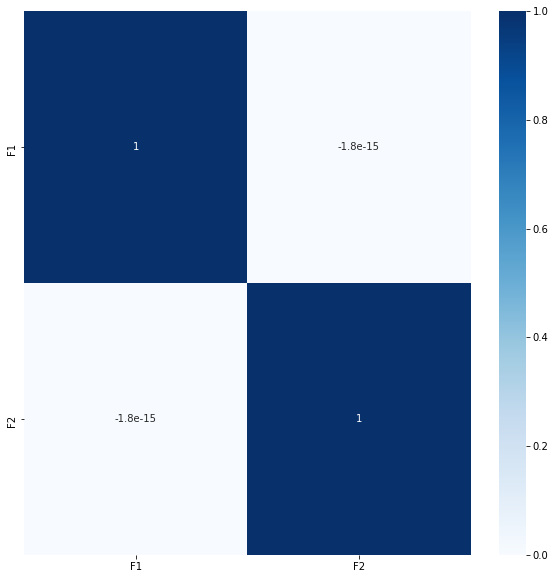

In [16]:
mat = x_train.corr()
tp_crr = mat.index

plt.figure(figsize=(10,10))
g = sns.heatmap(x_train[tp_crr].corr(),annot=True,cmap="Blues")

In [17]:
print(x_train.shape)
print(y_train.shape)

(129668, 2)
(129668, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=1)

In [19]:
#Logistic Regression

model4  = LogisticRegression()
model4.fit(X_train,y_train.values.ravel())
y_pred = pd.DataFrame(model4.predict(X_test))

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.9948353625762427
[[42570     0]
 [  221     0]]


In [20]:
#Isolation Forest .................
Fraud = new_df[new_df['is_fraud']==1]

Valid = new_df[new_df['is_fraud']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
state = np.random.RandomState(42)

model1 = IsolationForest(n_estimators = 100,max_samples = len(X_train),contamination = outlier_fraction,random_state = state,verbose = 0)
model1.fit(X_train,y_train)
arr = model1.predict(X_test)

arr[arr == -1] = 1
arr[arr == 1] = 0


print(accuracy_score(y_test,arr))


0.9948353625762427


In [21]:
#Local Outlier ................

model2 = LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)

y_pred = pd.DataFrame(model2.fit_predict(X_train))
sc = model2.negative_outlier_factor_

y_pred[y_pred == -1] = 1
y_pred[y_pred == 1] = 0

In [22]:

print(accuracy_score(y_train,y_pred))

0.9944289052338363


In [23]:
#Naive bayes

In [24]:
x_train = pd.DataFrame(x_pca,columns=['F1','F2'])
y_train = new_df['is_fraud']


In [25]:
#As data is highly unbalanced and large there for we perform oversampling...

from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.65)
x_train,y_train = os.fit_resample(x_train,y_train.values.ravel())

c:\users\shivam tyagi\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.65 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=1)

In [27]:
# Random forest algorithm..........
cls = RandomForestClassifier()
cls.fit(X_train,y_train)


y_pred = pd.DataFrame(cls.predict(X_test))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9991455547485795
[[42514    60]
 [    0 27647]]


In [28]:
61/(61+27647) # random forest

0.00220153024397286